

통계분석은 대부분 빈도 관점에서 반복적으로 선택된 표본이 어떤 사건의 원소가 될 경향<br>

즉 사건의 확률을 산출하는데 초점을 맞추어 왔다. </br>

하지만 이는 어떤 가설의 신뢰도를 제시하지 못할뿐만 아니라 새로운 정보를 반영하지 못함

**확률을 상황에 따라 변할 수 있는 것**이라고 생각한다. 이는 기존의 개념과 다른 것으로 추가되는 새로운 증거에 따라 확률을 새로 계산 및 개선한다.

‘**이전의 경험**과 **현재의 증거**를 토대로 ***어떤 사건의 확률***을 추론한다’. 즉, 사전 정보를 바탕으로 어떤 사건이 일어날 확률을 토대로 의사결정을 할 때 활용된다.

http://expertchoice.co.kr/bayes_theorem.html

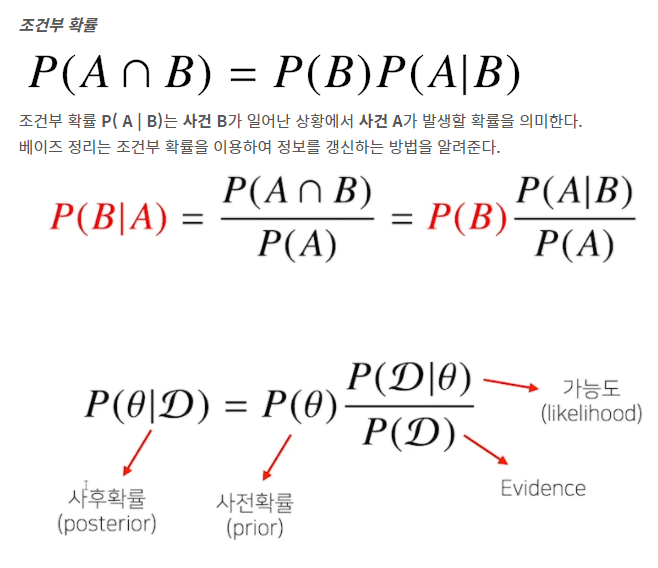

사후 확률 : 사건 발생이후에 어떤 원인으로부터 일어난것이라고 여겨지는 확률

              추가된 정보로부터 사전 정보를 새롭게 수정한 확률 ( 수정 확률 )
              조건부 확률을 통해 사후 확률을 표현할 수 있음

사전 확률 : 현재 가지고 있는 정보를 기초로 하여 정한 초기 확률

              ex) 전염병 검사를 받기전에 일반적인 전염병에 걸릴 확률

전염병의 발병률은 10%. 실제로 걸렸을 때 검진될 확률은 99% , 실제로 걸리지 않았을 때 오 검진될 확률은 10%이다.</br>
어떤 사람이 질병에 걸렸다고 검진 결과에 나왔을 때 정말로 전염병에 감염되었을 확률은?

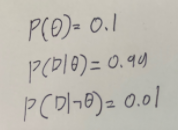

                                                        0.01 이 아닌 0.1입니다

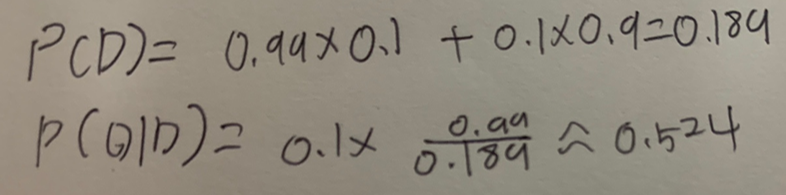

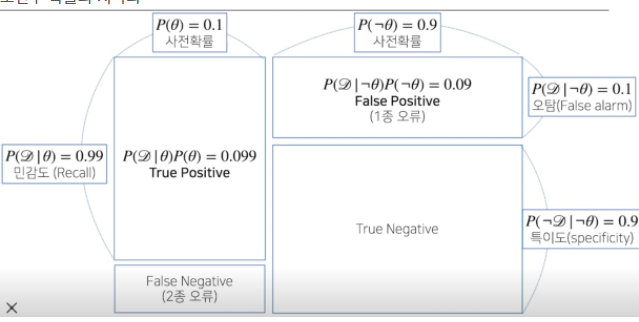

뒤에 가서 설명

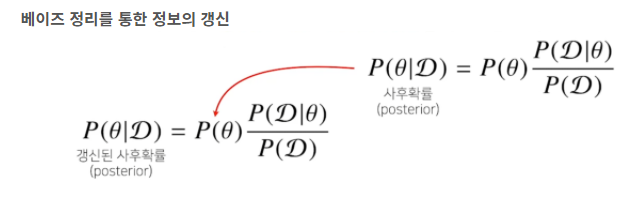

전염병 확진 판정을 받은 사람이 두 번째 검진을 받았을 때도 양성이 나왔을 때 진짜 전염병에 걸릴 확률은?
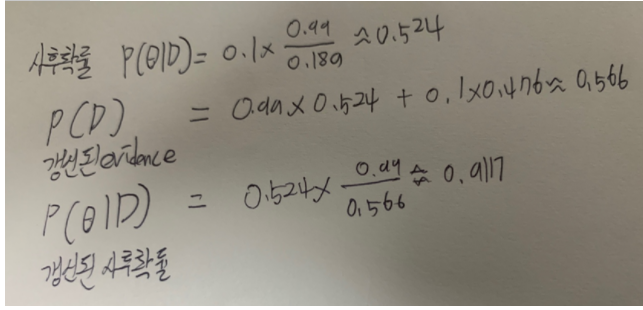

조건부 확률은 유용한 통계적 해석을 제공하지만 인과관계(causality)를 추론할 때는 함부로 사용해선 안된다.

인과관계는 데이터 분포의 변화에 강건한 예측모형을 만들 때 필요하다.

인과관계를 알아내기 위해서는 중첩 요인(confounding factor)의 효과를 제거하고 원인에 해당하는 변수만의 인과관계를 계산해야 한다.

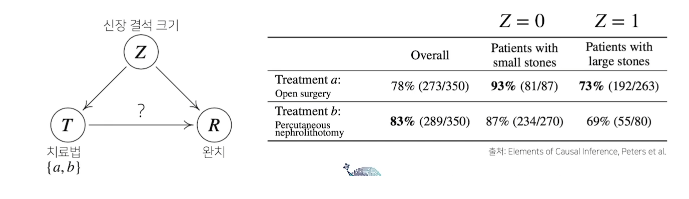

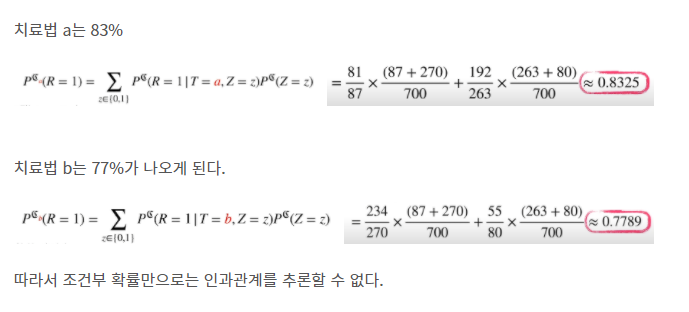

## 주의할점 

상관관계(correlation)를 인과관계(causation)는 다르다.

변수 x는 변수 y를 예측할 때 도움이 되지만, 이것이 x가 y의 원인이 된다는 의미는 아니다.


ex) 해변 리조트에서 물에 빠져 죽은 횟수와  해당기간에 팔린 아이스크림의 수 
     
    아이스크림때문에 물에 빠져죽지 않는 것이 아니라 더운 날에 아이스크림을 더 많이먹고 수영을 할 확률이 높기 때문
     
    따라서 두 변수는 상관관계가 있지만 하나가 서로 다른 원인이 되는것은 아니다.
    
    두가지 변수 모두 제3의 변수인 기온이 원인이다.



## 다중공선성

두 예측변수 x,y 의 상관관계가 아주 높은 상황

x 하나의 값을 알면 y 변수의 값을 알수있다.

미래 예측변수(predictor variable)의 값이 예측변수의 과거 값의 범위를 벗어날 때 예측값을 신뢰할 수 없다.

출처 : https://otexts.com/fppkr/causality.html

In [1]:
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False



In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int)

In [5]:
28*28

784

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(max_iter=5, random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.964 , 0.9579, 0.9571])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.964


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9579
0.9571


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [13]:

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90745, 0.9125 ])

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54058,   521],
       [ 1899,  3522]], dtype=int64)

정확도는 측정의 지표로써 신뢰할수 없다.
ex ) 숫자 5가 아닌경우 -> 무조건 아니라고 예측해도 정확도 90%


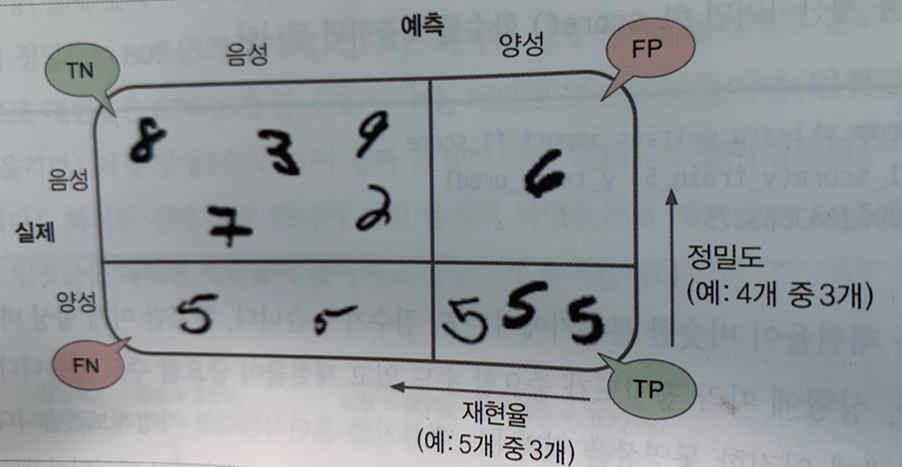

정밀도 : TP / TP + FP   -> P라고 예측한것중에 실제로 양성인 비율  ex) 암  진단 <br>
재현율 : TP /TP+FN      ->   분류기가 정확하게 감지한 양성의 비율  ex ) 스팸메시지


In [17]:

y_train_perfect_predictions = y_train_5

In [18]:

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8711352955725946

In [20]:
recall_score(y_train_5, y_train_pred)

0.6496956281128943

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


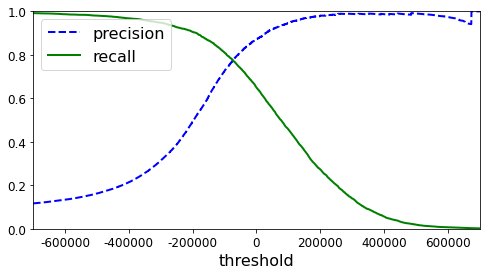

In [23]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)
    plt.xlabel("threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

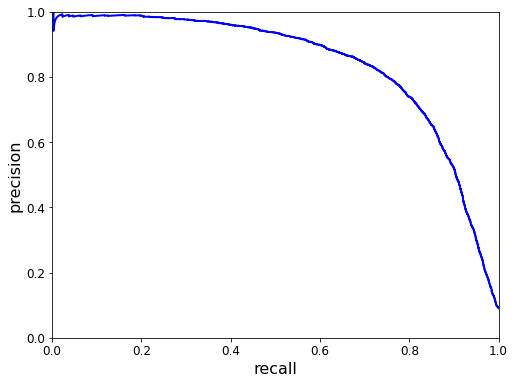

In [24]:

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

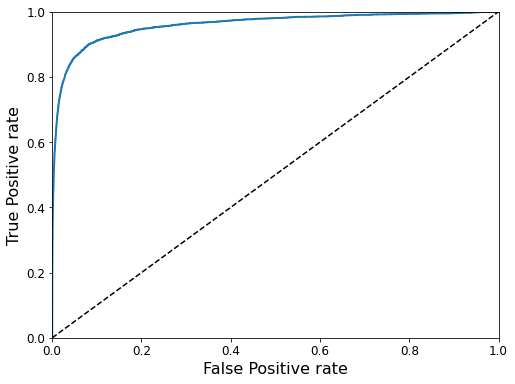

In [26]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive rate', fontsize=16)
    plt.ylabel('True Positive rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

특이도 진짜 음성 비율 (true negative rate : TNR): 정확하게 분류한 음성샘플비율

재현율 ( 진짜 양성 비율 true positive rate) : 정확하게 분류한 양성샘플비율

거짓 양성 비율 (false positive rate : FPR)

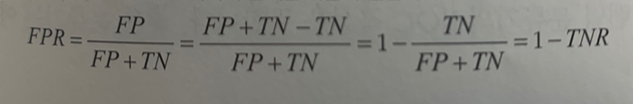


ROC Curve : 재현율(민감도)에 대한 1 - 특이도  그래프

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9598058535696421

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [29]:

y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

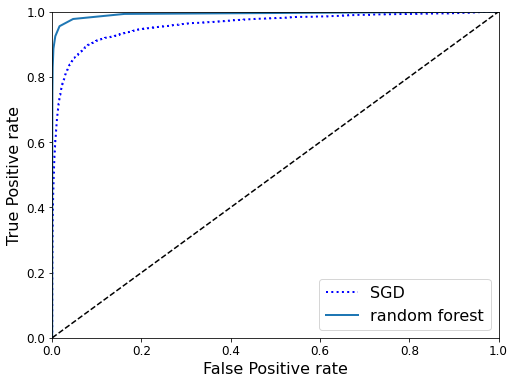

In [30]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "random forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [31]:

roc_auc_score(y_train_5, y_scores_forest)

0.9928250745111685

In [32]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9870386643233744

In [33]:
recall_score(y_train_5, y_train_pred_forest)

0.8288138719793396

코드출처 : https://github.com/rickiepark/handson-ml/blob/master/03_classification.ipynb